# ZT prediction with normalized Data, which remove effect of different experiment condition

import Lib and Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

In [2]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'zt_train.csv')

test_path = os.path.join(PATH, 'zt_test.csv')

df_train = pd.read_csv(train_path)

df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')

print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (127, 5)
df_test DataFrame shape: (18, 5)


In [3]:
df_train.head()

,formula,k,c,s,zt
0,Bi1Cu1Se1O1,1.000000,1.000000,1.000000,1.000000
1,Bi0.98Sn0.02Cu1Se1O1,1.185518,0.914338,0.992608,0.759896
2,Bi0.96Sn0.04Cu1Se1O1,1.389035,0.955253,1.025874,0.723758
3,Bi0.94Sn0.06Cu1Se1O1,1.221515,0.617039,1.170023,0.691516
4,Bi0.99Cd0.01Cu1Se1O1,0.835767,1.517739,0.946847,1.628063


In [4]:
#Change column name to fit cbfv.composition

print('DataFrame column names before renaming:')
print(df_train.columns)

print(df_test.columns)

rename_dict = {'zt': 'target'}
df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)

print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'k', 'c', 's', 'zt'], dtype='object')
Index(['formula', 'k', 'c', 's', 'zt'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'k', 'c', 's', 'target'], dtype='object')
Index(['formula', 'k', 'c', 's', 'target'], dtype='object')


# generate features(descriptors) with import package to fit and train model

In [31]:
#Import the package and the generate_features function
from cbfv.composition import generate_features

X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

Assigning Features...: 100%|██████████| 18/18 [00:00<00:00, 10651.45it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [32]:
len(y_train)

127

In [33]:
X_train_unscaled

,sum_Number,sum_MendeleevNumber,sum_AtomicWeight,sum_MeltingT,sum_Column,sum_Row,sum_CovalentRadius,sum_Electronegativity,sum_NsValence,sum_NpValence,...,range_NValence,range_NsUnfilled,range_NpUnfilled,range_NdUnfilled,range_NfUnfilled,range_NUnfilled,range_GSvolume_pa,range_GSbandgap,range_GSmagmom,range_SpaceGroupNumber
0,154.000,326.000,367.485800,2450.9700,58.00,16.00,466.00,9.91000,7.00,11.000,...,73.25,0.1875,1.1875,0.0,0.00,0.50,100.241705,0.119700,0.0,8454.1875
1,153.340,325.880,365.680392,2450.1836,57.98,15.98,465.82,9.90880,7.00,10.980,...,58.96,0.1600,1.7600,0.0,0.00,1.04,109.456054,0.102144,0.0,7669.3600
2,152.680,325.760,363.874984,2449.3972,57.96,15.96,465.64,9.90760,7.00,10.960,...,58.96,0.1600,1.7600,0.0,0.00,1.04,109.456054,0.102144,0.0,7669.3600
3,152.020,325.640,362.069576,2448.6108,57.94,15.94,465.46,9.90640,7.00,10.940,...,58.96,0.1600,1.7600,0.0,0.00,1.04,109.456054,0.102144,0.0,7669.3600
4,153.650,325.840,366.520106,2451.4682,57.97,15.99,465.96,9.90670,7.00,10.970,...,60.56,0.1600,1.4400,0.0,0.00,1.04,80.204706,0.102144,0.0,9395.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,150.800,322.600,359.404224,2447.3416,57.44,15.84,465.20,9.86840,6.96,10.880,...,92.24,0.2400,1.4400,0.0,0.00,0.56,81.799075,0.102144,0.0,11027.4400
123,149.200,320.900,355.363436,2445.5274,57.16,15.76,464.80,9.84760,6.94,10.820,...,92.24,0.2400,1.4400,0.0,0.00,0.56,81.799075,0.102144,0.0,11027.4400
124,153.475,324.425,366.020290,2470.9850,57.70,16.00,467.25,9.88875,7.00,10.925,...,67.60,0.1600,1.4400,0.0,10.24,6.16,109.218520,0.102144,0.0,8371.3600
125,152.950,322.850,364.554780,2491.0000,57.40,16.00,468.50,9.86750,7.00,10.850,...,67.60,0.1600,1.4400,0.0,10.24,6.16,109.218520,0.102144,0.0,8371.3600


In [8]:
#Select feature by stepwise backword feature selection

#X_train_unscaled = X_train_unscaled[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]
#X_test_unscaled = X_test_unscaled[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]


#X_train_unscaled = X_train_unscaled.iloc[:,[2, 6, 7, 25, 27, 39, 56, 73]]
#X_test_unscaled = X_test_unscaled.iloc[:,[2, 6, 7, 25, 27, 39, 56, 73]]



#new
#X_train_unscaled = X_train_unscaled[['range_SpaceGroupNumber','range_NfValence','range_NValence','range_Row','var_NValence']]
#X_test_unscaled = X_test_unscaled[['range_SpaceGroupNumber','range_NfValence','range_NValence','range_Row','var_NValence']]






In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)

X_test = scaler.transform(X_test_unscaled)

In [35]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [36]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [37]:
print(df_train.columns)
print(df_test.columns)

Index(['formula', 'k', 'c', 's', 'target'], dtype='object')
Index(['formula', 'k', 'c', 's', 'target'], dtype='object')


# Implement fuction to train different models at the same time

In [38]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
       }
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [39]:

df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    ])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train


In [40]:
# Build a dictionary of model names
from collections import OrderedDict
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
    'xgb': XGBRegressor,
})


In [41]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor
Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knr: KNeighborsRegressor
Now fitting and evaluating model xgb: XGBRegressor
[09:22:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finished fitting 10 models, total time: 1.06 s


In [42]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_train', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.000417,0.000000,1.067041,1.518942
1,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.003190,0.461008,0.592107,1.115147
2,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.004063,0.510805,0.516171,1.062386
3,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.005252,0.567454,0.646185,0.998981
4,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.000886,0.586513,0.634099,0.976724
5,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.044009,0.858037,0.426250,0.572307
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.361344,0.894555,0.297606,0.493235
7,xgb,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.124838,0.929255,0.215816,0.404007
8,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.225106,0.930953,0.206517,0.399129
9,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",0.220172,0.935336,0.138583,0.386255


In [43]:
classic_models


OrderedDict([('dumr', DummyRegressor()),
             ('rr', Ridge()),
             ('abr', AdaBoostRegressor()),
             ('gbr', GradientBoostingRegressor()),
             ('rfr', RandomForestRegressor()),
             ('etr', ExtraTreesRegressor()),
             ('svr', SVR()),
             ('lsvr', LinearSVR()),
             ('knr', KNeighborsRegressor()),
             ('xgb', XGBRegressor())])

In [44]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

In [19]:

#import torch.optim as optim
#from matminer.figrecipes.plot import PlotlyFig


#def plot_pred_act(act, pred, model, reg_line=True, label=''):
#    xy_max = np.max([np.max(act), np.max(pred)])

#    pf = PlotlyFig(x_title=f'Actual {label}',
#               y_title=f'Predicted {label}',
#               title=f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}, mse: {mean_squared_error(act, pred):0.4f}',
#               mode='notebook',
#               filename="lr_regression.html")

#    pf.xy(xy_pairs=[(act, pred), ([0, xy_max], [0, xy_max])], 
#              labels=df_test['formula'], 
#              modes=['markers', 'lines'],
#              lines=[{}, {'color': 'black', 'dash': 'dash'}], 
#              showlegends=False
#             )
    
#    return pf

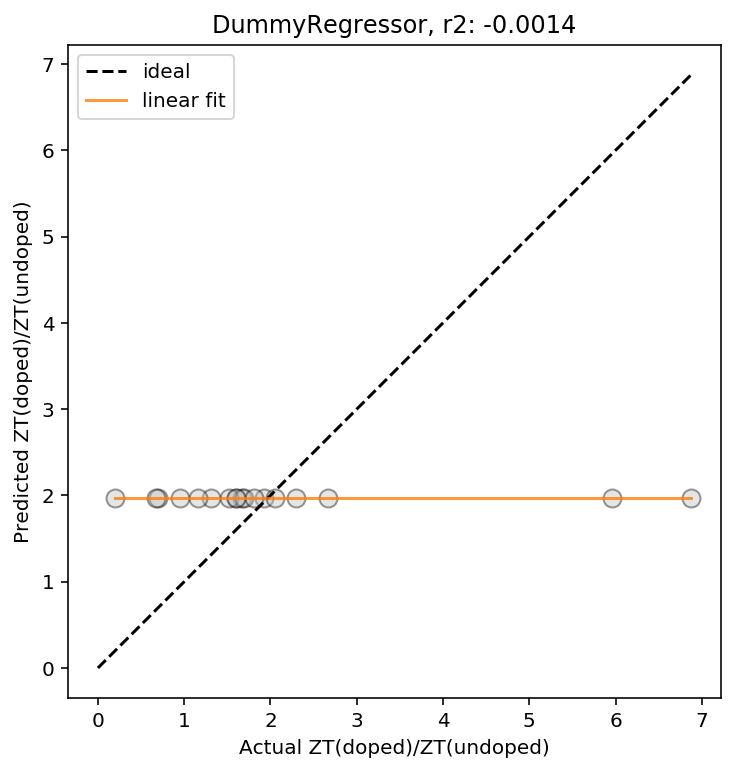

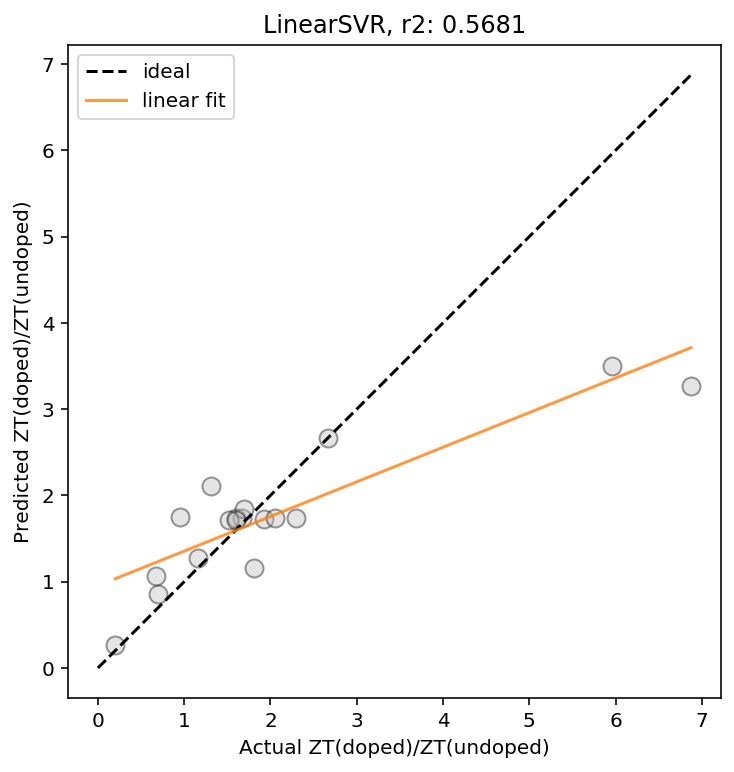

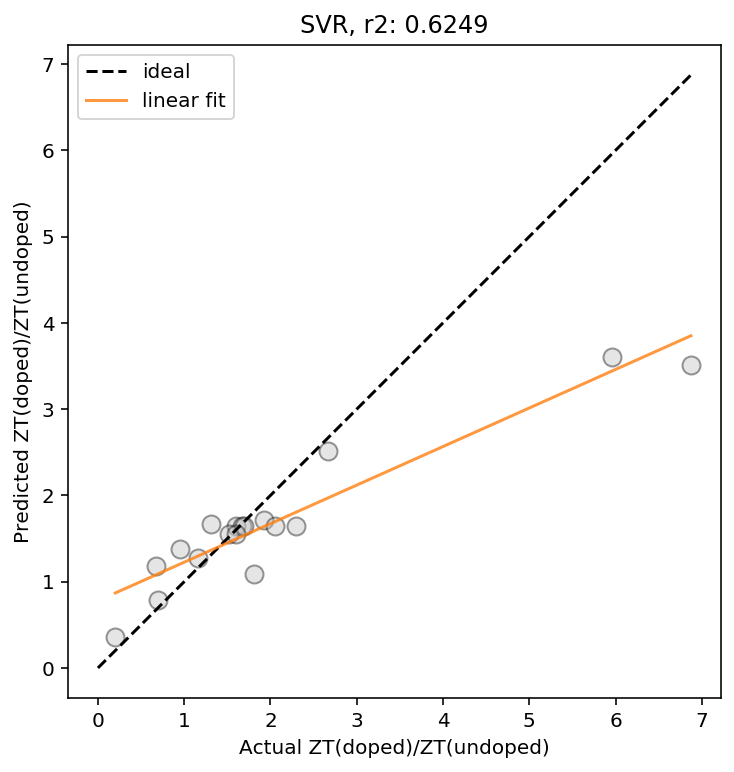

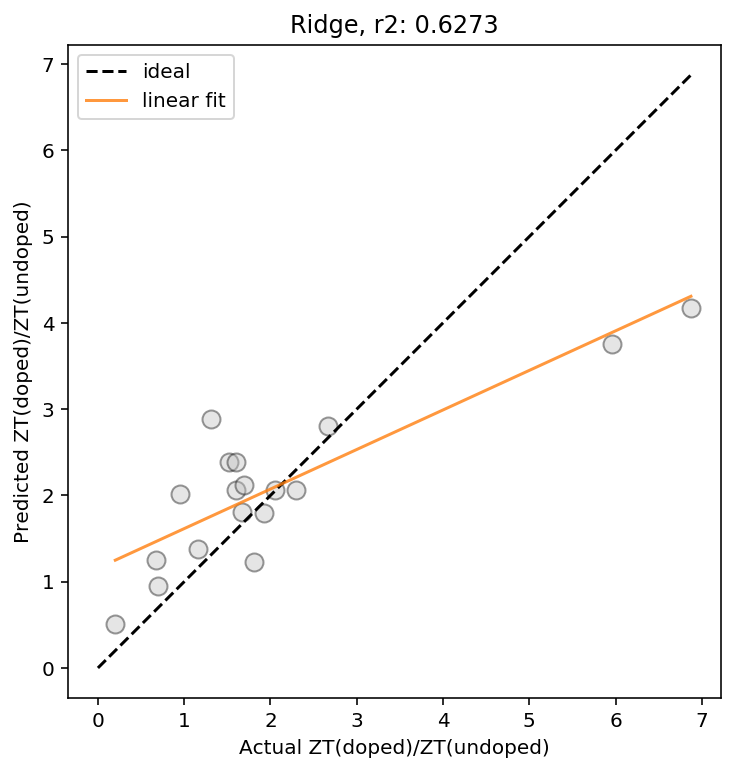

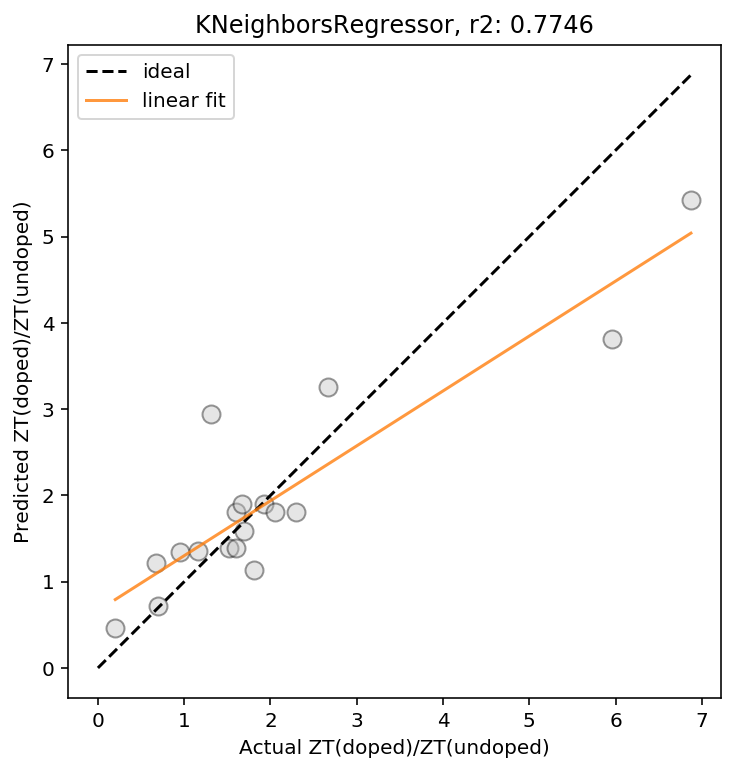

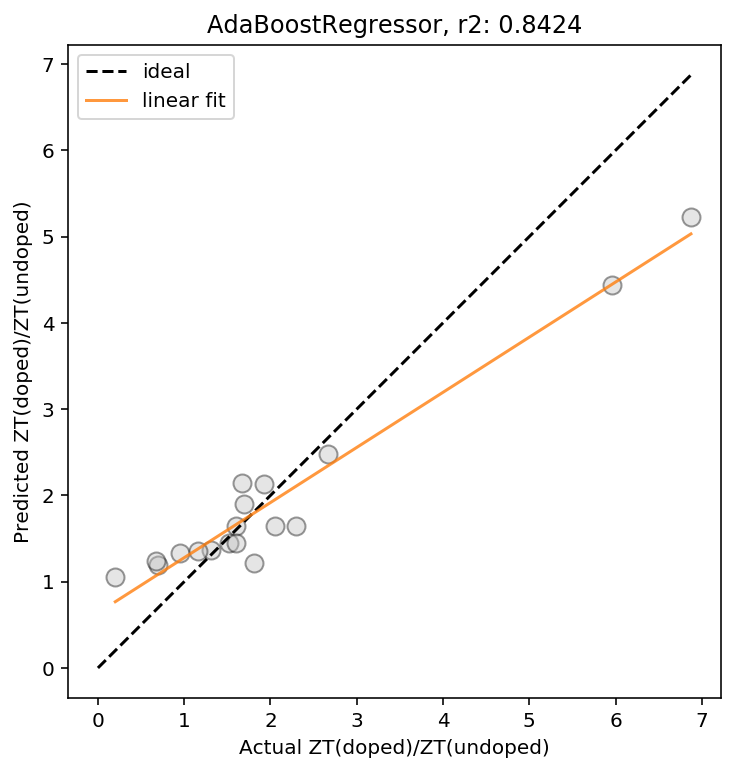

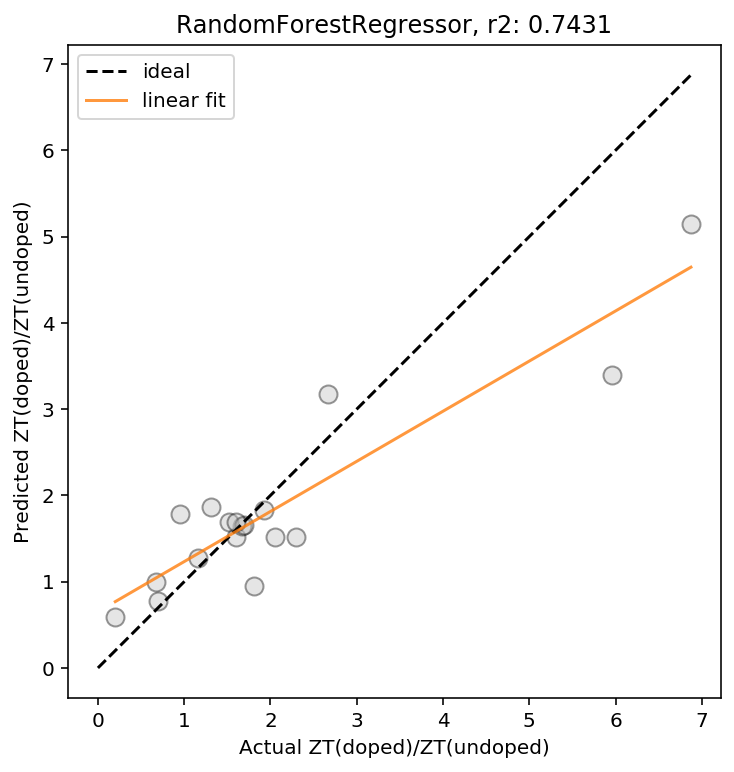

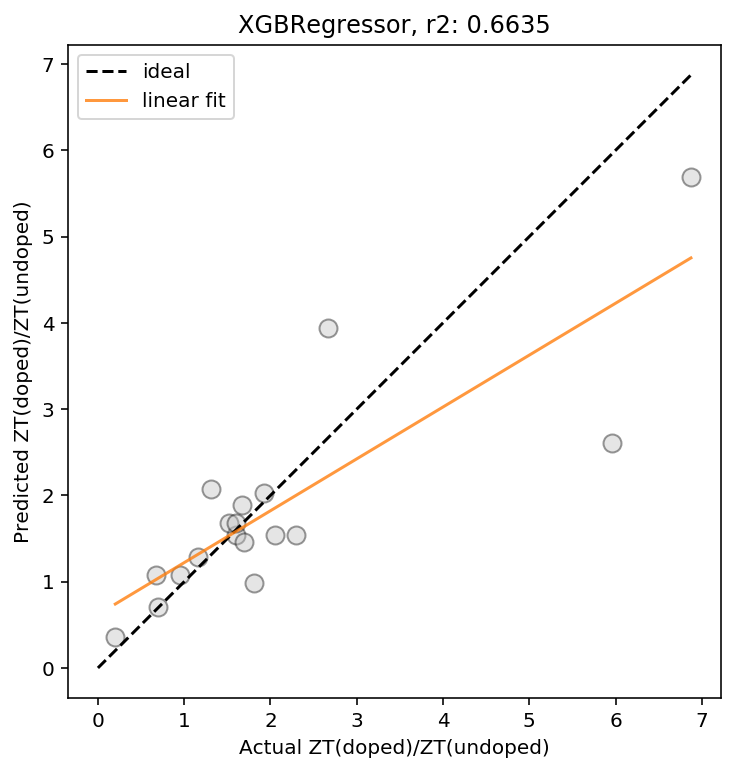

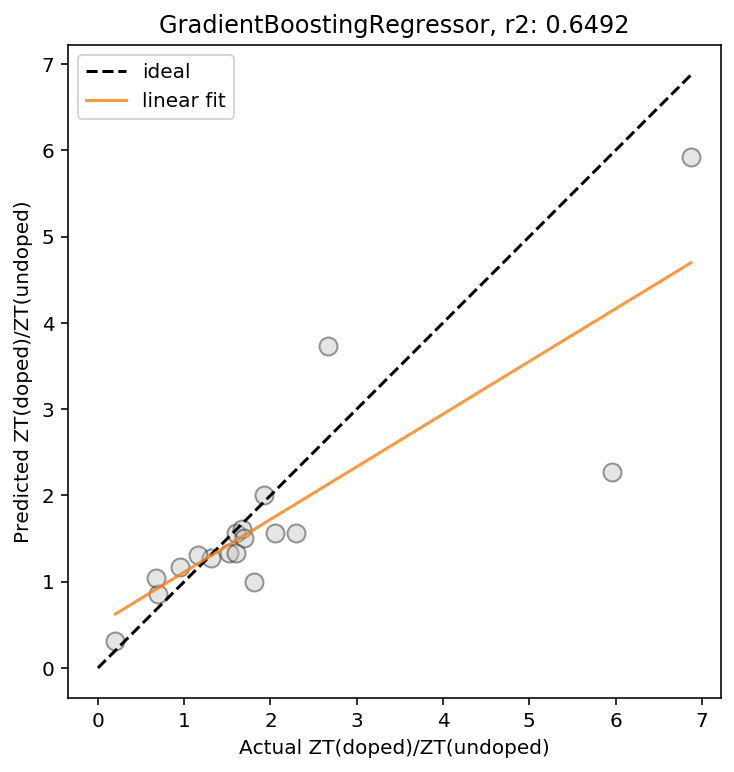

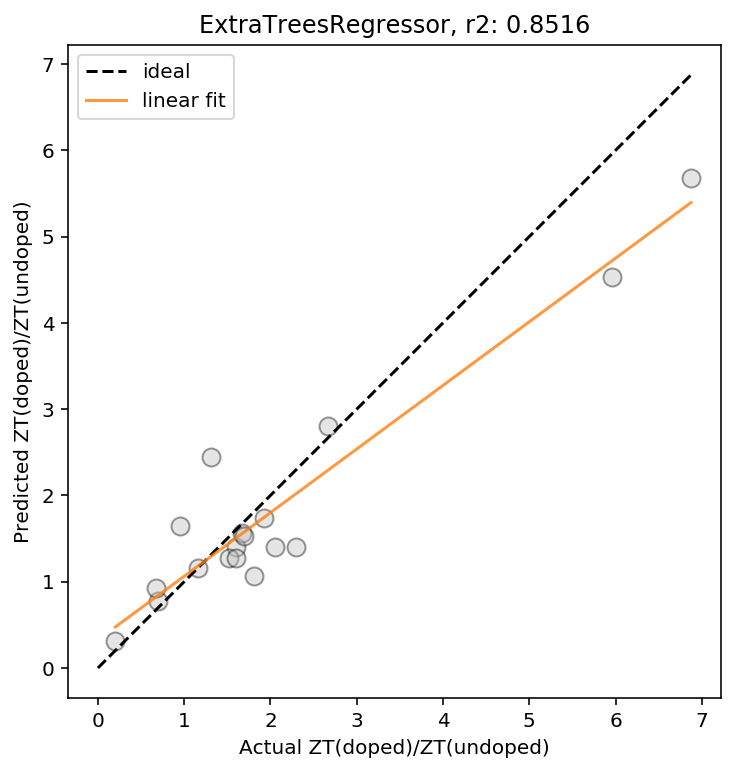

In [45]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_test = y_test
    y_pred_test = model.predict(X_test)

    plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='ZT(doped)/ZT(undoped)')

In [46]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.model_selection import cross_val_score as crovasco

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# check features important

In [47]:
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [48]:
y_train_encoded

array([ 27,   8,   7,   6,  78,  97,  83,  48,  40,  41,   3,  20,  32,
        63,  68,  71,  80,  42,  36,  98,  93,  94,  90, 103,  55,  35,
        12,  65,  61,  46,  30,  52,  31,  26,  25,  38,  34, 115, 120,
       125, 122, 116,  79,  53,  60,  77,  88,  11,  57,  67, 124, 119,
       126,  54,  66,  72,  91, 109, 104,  13,  18,  19,  24,   9,  14,
        44,  17, 107, 112, 121, 118,  56,  22, 102, 106, 114, 111,  92,
        95, 100,  99,  50,  10,  28,  76,  85,  84,  69,  39,  58,  82,
        86,  75,  74,  87, 108, 105, 110,   2,   1,   0,  81, 101,  73,
        64,  89,  96,  37,  45,  70,  59,  15,  21,  23,  49,  62,  29,
        43,  47,   5,   4, 113, 117, 123,  51,  16,  33])

In [49]:
from sklearn.ensemble import RandomForestClassifier as Rafo
from sklearn.ensemble import RandomForestRegressor as RaFr
from sklearn.ensemble import ExtraTreesRegressor as ET
from sklearn.ensemble import GradientBoostingRegressor as GB
from sklearn.neighbors import KNeighborsRegressor as KN

np.random.seed(0)
rafo = GB()
rafo.fit(X_train_unscaled,y_train_encoded)
print(rafo.feature_importances_)

[8.45392149e-03 9.74575765e-03 5.43643066e-03 2.36157042e-02
 1.14028315e-02 2.30811343e-03 9.59743735e-03 6.54386606e-03
 6.24349845e-03 3.90862304e-03 1.08140098e-04 6.39508389e-03
 3.31647688e-03 1.10142458e-02 2.06023006e-03 4.69129013e-03
 1.22786587e-04 9.97366326e-03 1.47590167e-02 0.00000000e+00
 0.00000000e+00 8.53708529e-03 1.87308661e-02 1.17963096e-02
 1.42673174e-02 1.63623495e-02 2.13692969e-03 1.39917009e-03
 8.53257954e-03 1.35575634e-02 8.07703414e-04 4.96066658e-03
 6.49527197e-05 1.36100151e-02 1.19507587e-02 2.83114620e-03
 1.54974177e-03 9.70517095e-04 2.26869104e-03 1.45684347e-02
 2.74455298e-02 0.00000000e+00 0.00000000e+00 1.25323701e-02
 2.08878782e-04 2.36385864e-03 1.49731450e-03 1.47598297e-04
 2.09278374e-02 0.00000000e+00 4.14981884e-04 7.61028478e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.47318612e-06
 4.60128037e-04 6.39344550e-03 9.43394475e-04 0.00000000e+00
 0.00000000e+00 0.000000

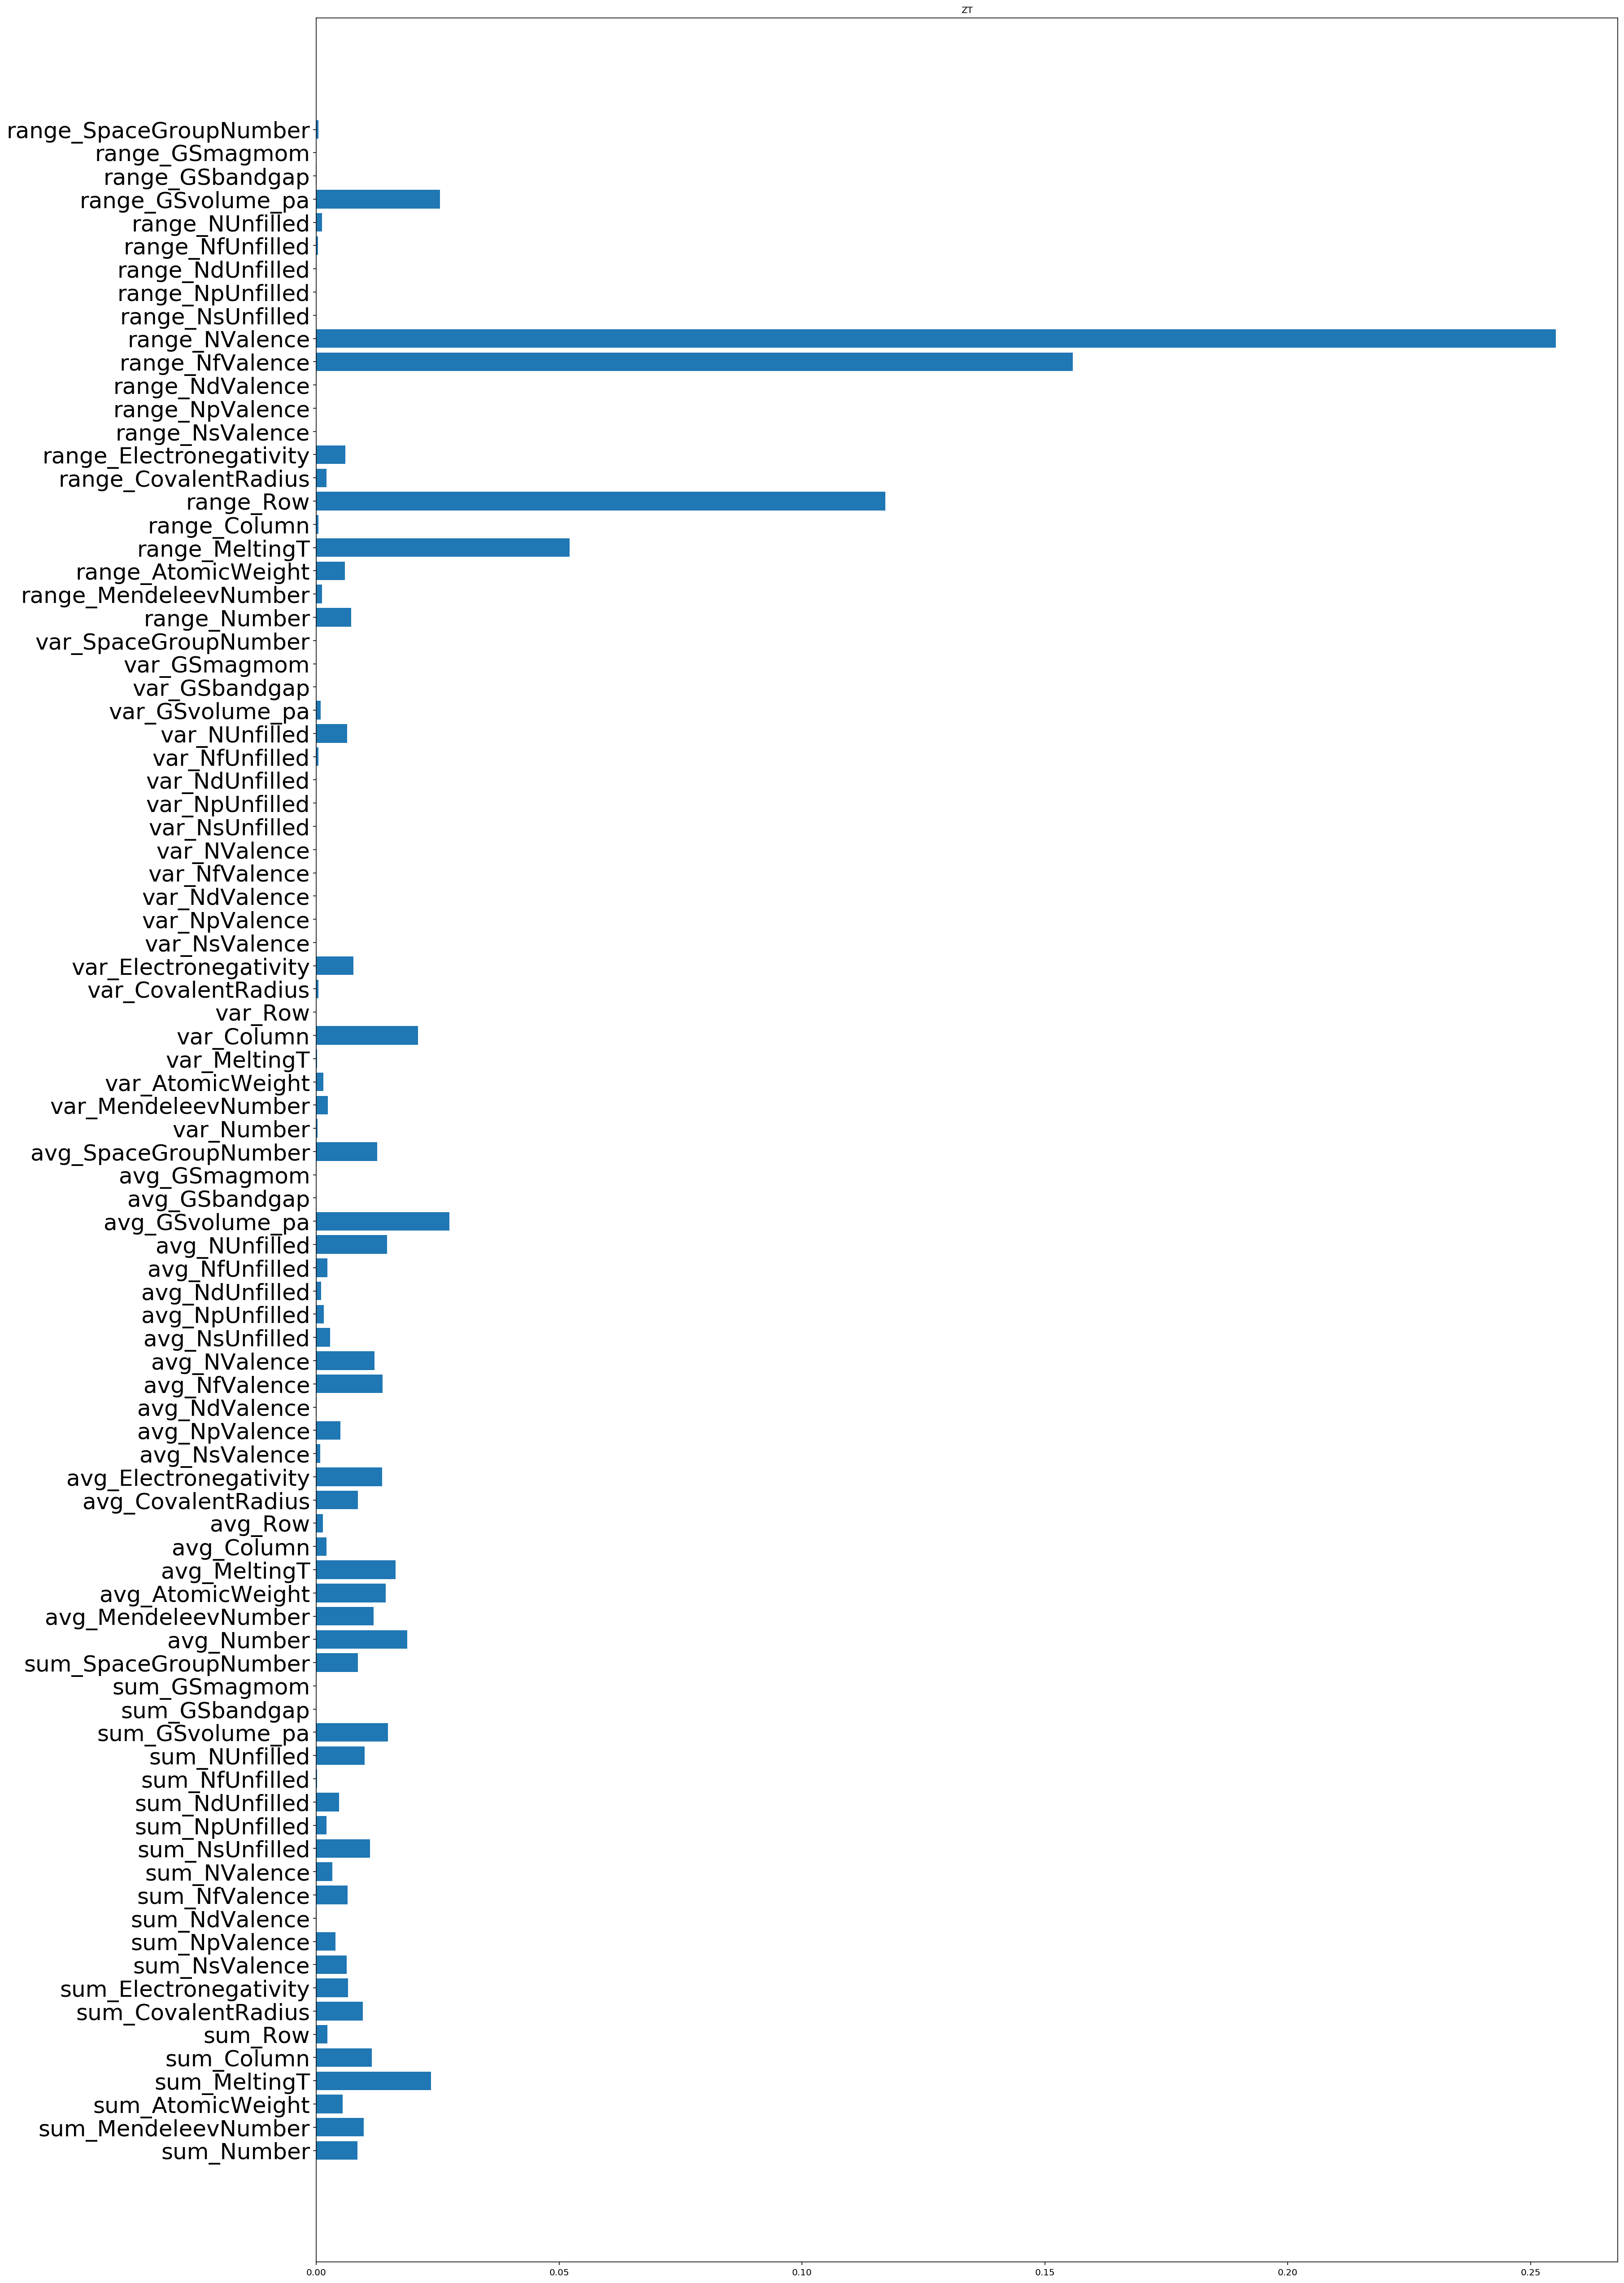

In [50]:
plt.figure(figsize=[26,46])
plt.axes()
plt.barh(np.arange(88),rafo.feature_importances_, )
plt.yticks(np.arange(88),X_train_unscaled.columns, fontsize=25 )
plt.title('ZT',fontsize=10)
plt.show()

#'var_NValence', 'range_SpaceGroupNumber', 'range_row', 'var_Column','range_NfValence', 'var_GSVolume_pa'
#'range_SpaceGroupNumber','var_NValence','range_ROW','var_GSvolume_pa','range_SpaceGroupNumber','var_column','range_Electronegativity'

#'range_SpaceGroupNumber','range_NfValence','range_NValence','range_Row','var_Nvalence'


In [26]:
X_train_unscaled[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]

,var_NValence,range_SpaceGroupNumber,range_Row,var_Column,range_NfValence,var_GSvolume_pa
0,23.0,8454.187500,2.000000,5.0,36.750000,23.845
1,23.0,7669.360000,1.760000,5.0,31.360000,24.180
2,23.0,7669.360000,1.760000,5.0,31.360000,24.180
3,23.0,7669.360000,1.760000,5.0,31.360000,24.180
4,28.0,11027.440000,1.760000,15.0,31.360000,23.845
...,...,...,...,...,...,...
220,23.0,8454.187500,2.000000,5.0,36.750000,23.845
221,23.0,10821.040000,2.240000,5.0,47.040000,23.845
222,23.0,11271.805556,1.916667,5.0,43.555556,23.845
223,23.0,11271.805556,1.916667,5.0,43.555556,23.845


In [27]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

Assigning Features...: 100%|██████████| 36/36 [00:00<00:00, 7435.24it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [28]:
X_train_original = X_train_unscaled.copy()

X_test = X_test_unscaled.copy()

y_train_original = y_train.copy()


In [29]:
splits = range(10)
df_splits = pd.DataFrame(columns=['split',
                                  'r2_train',
                                  'mae_train',
                                  'rmse_train',
                                  'r2_val',
                                  'mae_val',
                                  'rmse_val'])

for split in splits:
    print(f'Fitting and evaluating random split {split}')
    X_train = X_train_original.sample(frac=0.5, random_state=split)
    y_train = y_train_original[X_train.index]

    scaler = StandardScaler()
    X_train = normalize(scaler.fit_transform(X_train))
    X_test = normalize(scaler.transform(X_test_unscaled))
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_act_val = y_test
    y_pred_val = model.predict(X_test)

    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_test, y_test)
    result_dict = {
        'split': split,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    
    df_splits = append_result_df(df_splits, result_dict)

Fitting and evaluating random split 0
[10:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting and evaluating random split 1
[10:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting and evaluating random split 2
[10:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting and evaluating random split 3
[10:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting and evaluating random split 4
[10:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting and evaluating random split 5
[10:45:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting and evaluating random split 6
[10:45:05] WARNING: src/objective/regr

In [30]:
df_splits['split'] = df_splits['split'].astype(int)
df_splits

,split,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,0,0.981747,0.120367,0.172188,0.503267,0.702796,1.183056
1,1,0.932606,0.206673,0.437142,0.078103,0.799797,1.611703
2,2,0.898103,0.168924,0.435430,0.517610,0.771347,1.165851
3,3,0.786795,0.228649,0.685431,0.613829,0.686327,1.043118
4,4,0.966580,0.127867,0.320257,0.672210,0.656518,0.961040
5,5,0.937886,0.147088,0.346456,0.626994,0.700348,1.025183
6,6,0.886778,0.208776,0.541704,-0.075961,1.046071,1.741173
7,7,0.943571,0.113680,0.306850,0.588438,0.761750,1.076865
8,8,0.728300,0.273236,0.693707,0.377238,0.871088,1.324661
9,9,0.902353,0.192212,0.445348,0.475872,0.749331,1.215241


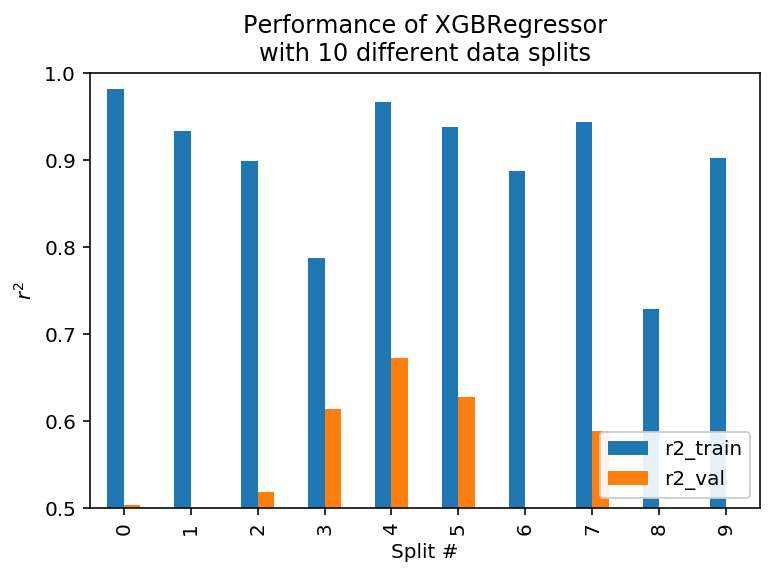

In [31]:
df_splits.plot('split', ['r2_train', 'r2_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylim((0.5, 1.0))
plt.ylabel('$r^2$')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

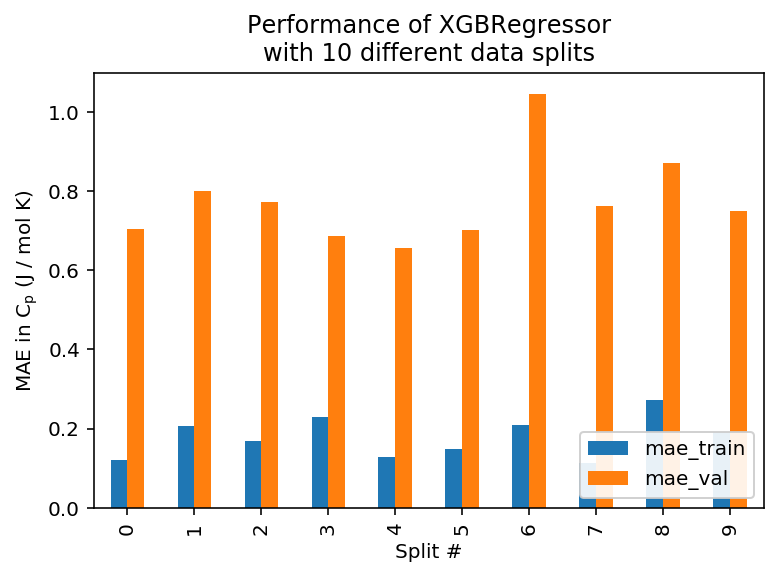

In [32]:
df_splits.plot('split', ['mae_train', 'mae_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylabel('MAE in $\mathrm{C}_\mathrm{p}$ (J / mol K)')
plt.xlabel('Split #')
plt.legend(loc='lower right', framealpha=0.9)
plt.show()

In [33]:
avg_r2_val = df_splits['r2_val'].mean()
avg_mae_val = df_splits['mae_val'].mean()

print(f'Average validation r2: {avg_r2_val:0.4f}')
print(f'Average validation MAE: {avg_mae_val:0.4f}')

Average validation r2: 0.4378
Average validation MAE: 0.7745


# Predict zt from construction composition

In [43]:
PATH = os.getcwd()
formula = os.path.join(PATH, 'formula.csv')
formula2 = os.path.join(PATH, 'formula2.csv')
formula3 = os.path.join(PATH, 'formula3.csv')

df_formula = pd.read_csv(formula)
df_formula2 = pd.read_csv(formula2)
df_formula3 = pd.read_csv(formula3)

print(f'df_train DataFrame shape: {df_formula.shape}')
print(f'df_train DataFrame shape: {df_formula2.shape}')
print(f'df_train DataFrame shape: {df_formula3.shape}')

df_train DataFrame shape: (19, 1)
df_train DataFrame shape: (19, 1)
df_train DataFrame shape: (361, 1)


In [44]:
bbb= tuple(range(400))
target = pd.DataFrame(bbb,columns=['target'])
target

,target
0,0
1,1
2,2
3,3
4,4
...,...
395,395
396,396
397,397
398,398


In [45]:
df_formula['target'] = target

df_formula2['target'] = target

df_formula3['target'] = target

df_formula.shape,df_formula2.shape, df_formula3.shape



((19, 2), (19, 2), (361, 2))

In [46]:
df_formula3

,formula,target
0,Bi0.98B0.02Cu0.98B0.02Se1O1,0
1,Bi0.98B0.02Cu0.98C0.02Se1O1,1
2,Bi0.98B0.02Cu0.98N0.02Se1O1,2
3,Bi0.98B0.02Cu0.98F0.02Se1O1,3
4,Bi0.98B0.02Cu0.98Al0.02Se1O1,4
...,...,...
356,Bi0.98At0.02Cu0.98I0.02Se1O1,356
357,Bi0.98At0.02Cu0.98Tl0.02Se1O1,357
358,Bi0.98At0.02Cu0.98Pb0.02Se1O1,358
359,Bi0.98At0.02Cu0.98Po0.02Se1O1,359


In [47]:
z, _, _, _ = generate_features(df_formula, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

z2, _, _, _ = generate_features(df_formula2, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

z3, _, _, _ = generate_features(df_formula3, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)


Assigning Features...: 100%|██████████| 361/361 [00:00<00:00, 10141.89it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [48]:
#z1= z[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]
z1= z[['range_SpaceGroupNumber','var_NValence','range_Row','var_GSvolume_pa','range_NfValence','var_Column','range_Electronegativity']]

#z11= z2[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]
z11= z2[['range_SpaceGroupNumber','var_NValence','range_Row','var_GSvolume_pa','range_NfValence','var_Column','range_Electronegativity']]

#z111= z3[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]
z111= z3[['range_SpaceGroupNumber','var_NValence','range_Row','var_GSvolume_pa','range_NfValence','var_Column','range_Electronegativity']]



In [49]:
z1

,range_SpaceGroupNumber,var_NValence,range_Row,var_GSvolume_pa,range_NfValence,var_Column,range_Electronegativity
0,8371.3600,26.0,2.24,25.77750,31.36,5.0,0.325520
1,9395.0400,25.0,2.24,27.31000,31.36,5.0,0.295736
2,9395.0400,24.0,2.24,23.84500,31.36,5.0,0.345520
3,7175.4400,23.0,2.24,23.84500,31.36,6.0,0.656096
4,10821.0400,26.0,1.76,23.84500,31.36,5.0,0.415304
5,10923.6000,25.0,1.76,23.84500,31.36,5.0,0.348256
6,7413.6000,24.0,1.76,23.84500,31.36,5.0,0.308120
7,6766.2400,23.0,1.76,23.84500,31.36,5.0,0.296576
8,6763.8400,23.0,1.76,23.84500,31.36,6.0,0.369424
9,6763.8400,23.0,1.60,23.84500,31.36,5.0,0.366184


In [50]:
#X_train = scaler.fit_transform(X_train_unscaled)

#Dope Bi position

z_test = scaler.transform(z1)

#X_train = normalize(X_train)
z_test = normalize(z_test)


#Dope Cu position

z_test2 = scaler.transform(z11)

#X_train = normalize(X_train)
z_test2 = normalize(z_test2)

#Dope Bi,Cu position

z_test3 = scaler.transform(z111)

#X_train = normalize(X_train)
z_test3 = normalize(z_test3)



In [51]:
from xgboost import XGBRegressor

model2 =  ET
model2

sklearn.ensemble._forest.ExtraTreesRegressor

In [52]:
model

ExtraTreesRegressor()

In [53]:
#Import the package and the generate_features function
from cbfv.composition import generate_features

X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

Assigning Features...: 100%|██████████| 18/18 [00:00<00:00, 8302.81it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [54]:
#Select feature by stepwise backword feature selection

X_train_unscaled = X_train_unscaled[['range_SpaceGroupNumber','var_NValence','range_Row','var_GSvolume_pa','range_NfValence','var_Column','range_Electronegativity']]
X_test_unscaled = X_test_unscaled[['range_SpaceGroupNumber','var_NValence','range_Row','var_GSvolume_pa','range_NfValence','var_Column','range_Electronegativity']]


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)

X_test = scaler.transform(X_test_unscaled)

X_train = normalize(X_train)
X_test = normalize(X_test)

In [55]:
len(X_train), len(y_train)

(127, 127)

In [56]:
X_train

array([[-0.46812756, -0.41423412,  0.10455793, -0.16960488,  0.1268521 ,
        -0.59910758, -0.44107499],
       [-0.59077198, -0.34146532, -0.22421664, -0.12880074, -0.18283218,
        -0.49386193, -0.4361192 ],
       [-0.59077198, -0.34146532, -0.22421664, -0.12880074, -0.18283218,
        -0.49386193, -0.4361192 ],
       [-0.59077198, -0.34146532, -0.22421664, -0.12880074, -0.18283218,
        -0.49386193, -0.4361192 ],
       [-0.18489132, -0.45005709, -0.29552133, -0.18427231, -0.24097592,
        -0.65091841, -0.40026305],
       [-0.18489132, -0.45005709, -0.29552133, -0.18427231, -0.24097592,
        -0.65091841, -0.40026305],
       [-0.18489132, -0.45005709, -0.29552133, -0.18427231, -0.24097592,
        -0.65091841, -0.40026305],
       [-0.44229223, -0.37060721, -0.2433521 , -0.15174219, -0.19843574,
        -0.53600991, -0.50803403],
       [-0.44229223, -0.37060721, -0.2433521 , -0.15174219, -0.19843574,
        -0.53600991, -0.50803403],
       [-0.44229223, -0.3706

In [57]:
model.fit(X_train, y_train)
model

ExtraTreesRegressor()

In [58]:
zzz = model.predict(z_test)

zzz2 = model.predict(z_test2)

zzz3 = model.predict(z_test3)

In [59]:
zt = pd.DataFrame(zzz,columns=['zt'])

zt_2 = pd.DataFrame(zzz2,columns=['zt'])

zt_3 = pd.DataFrame(zzz3,columns=['zt'])

In [60]:
zt['formula'] = df_formula['formula']
#zt.head(20)

zt_3['formula'] = df_formula3['formula']
zt_3.head()

,zt,formula
0,1.168618,Bi0.98B0.02Cu0.98B0.02Se1O1
1,1.226511,Bi0.98B0.02Cu0.98C0.02Se1O1
2,1.185393,Bi0.98B0.02Cu0.98N0.02Se1O1
3,0.911335,Bi0.98B0.02Cu0.98F0.02Se1O1
4,1.669233,Bi0.98B0.02Cu0.98Al0.02Se1O1


In [61]:
zt_3 = zt_3.sort_values(by=['zt'], ascending=False)
zt_31 = zt_3.head(30)
zt_31.head()

,zt,formula
93,3.032221,Bi0.98Al0.02Cu0.98Po0.02Se1O1
327,3.032221,Bi0.98Po0.02Cu0.98Al0.02Se1O1
308,2.944394,Bi0.98Pb0.02Cu0.98Al0.02Se1O1
92,2.944394,Bi0.98Al0.02Cu0.98Pb0.02Se1O1
112,2.812318,Bi0.98Si0.02Cu0.98Po0.02Se1O1


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#Nation2 = Nation.sort_values(['sales_per_person'],ascending=False).reset_index(drop=True)

plt.figure(figsize=(5,16))
ax = sns.set(font_scale = 2)
ax = sns.barplot(y='formula', x='zt', data=zt_31,palette="Blues_d")


ax.figure.savefig("prediction of dope 2 Bi,Cu.jpg")






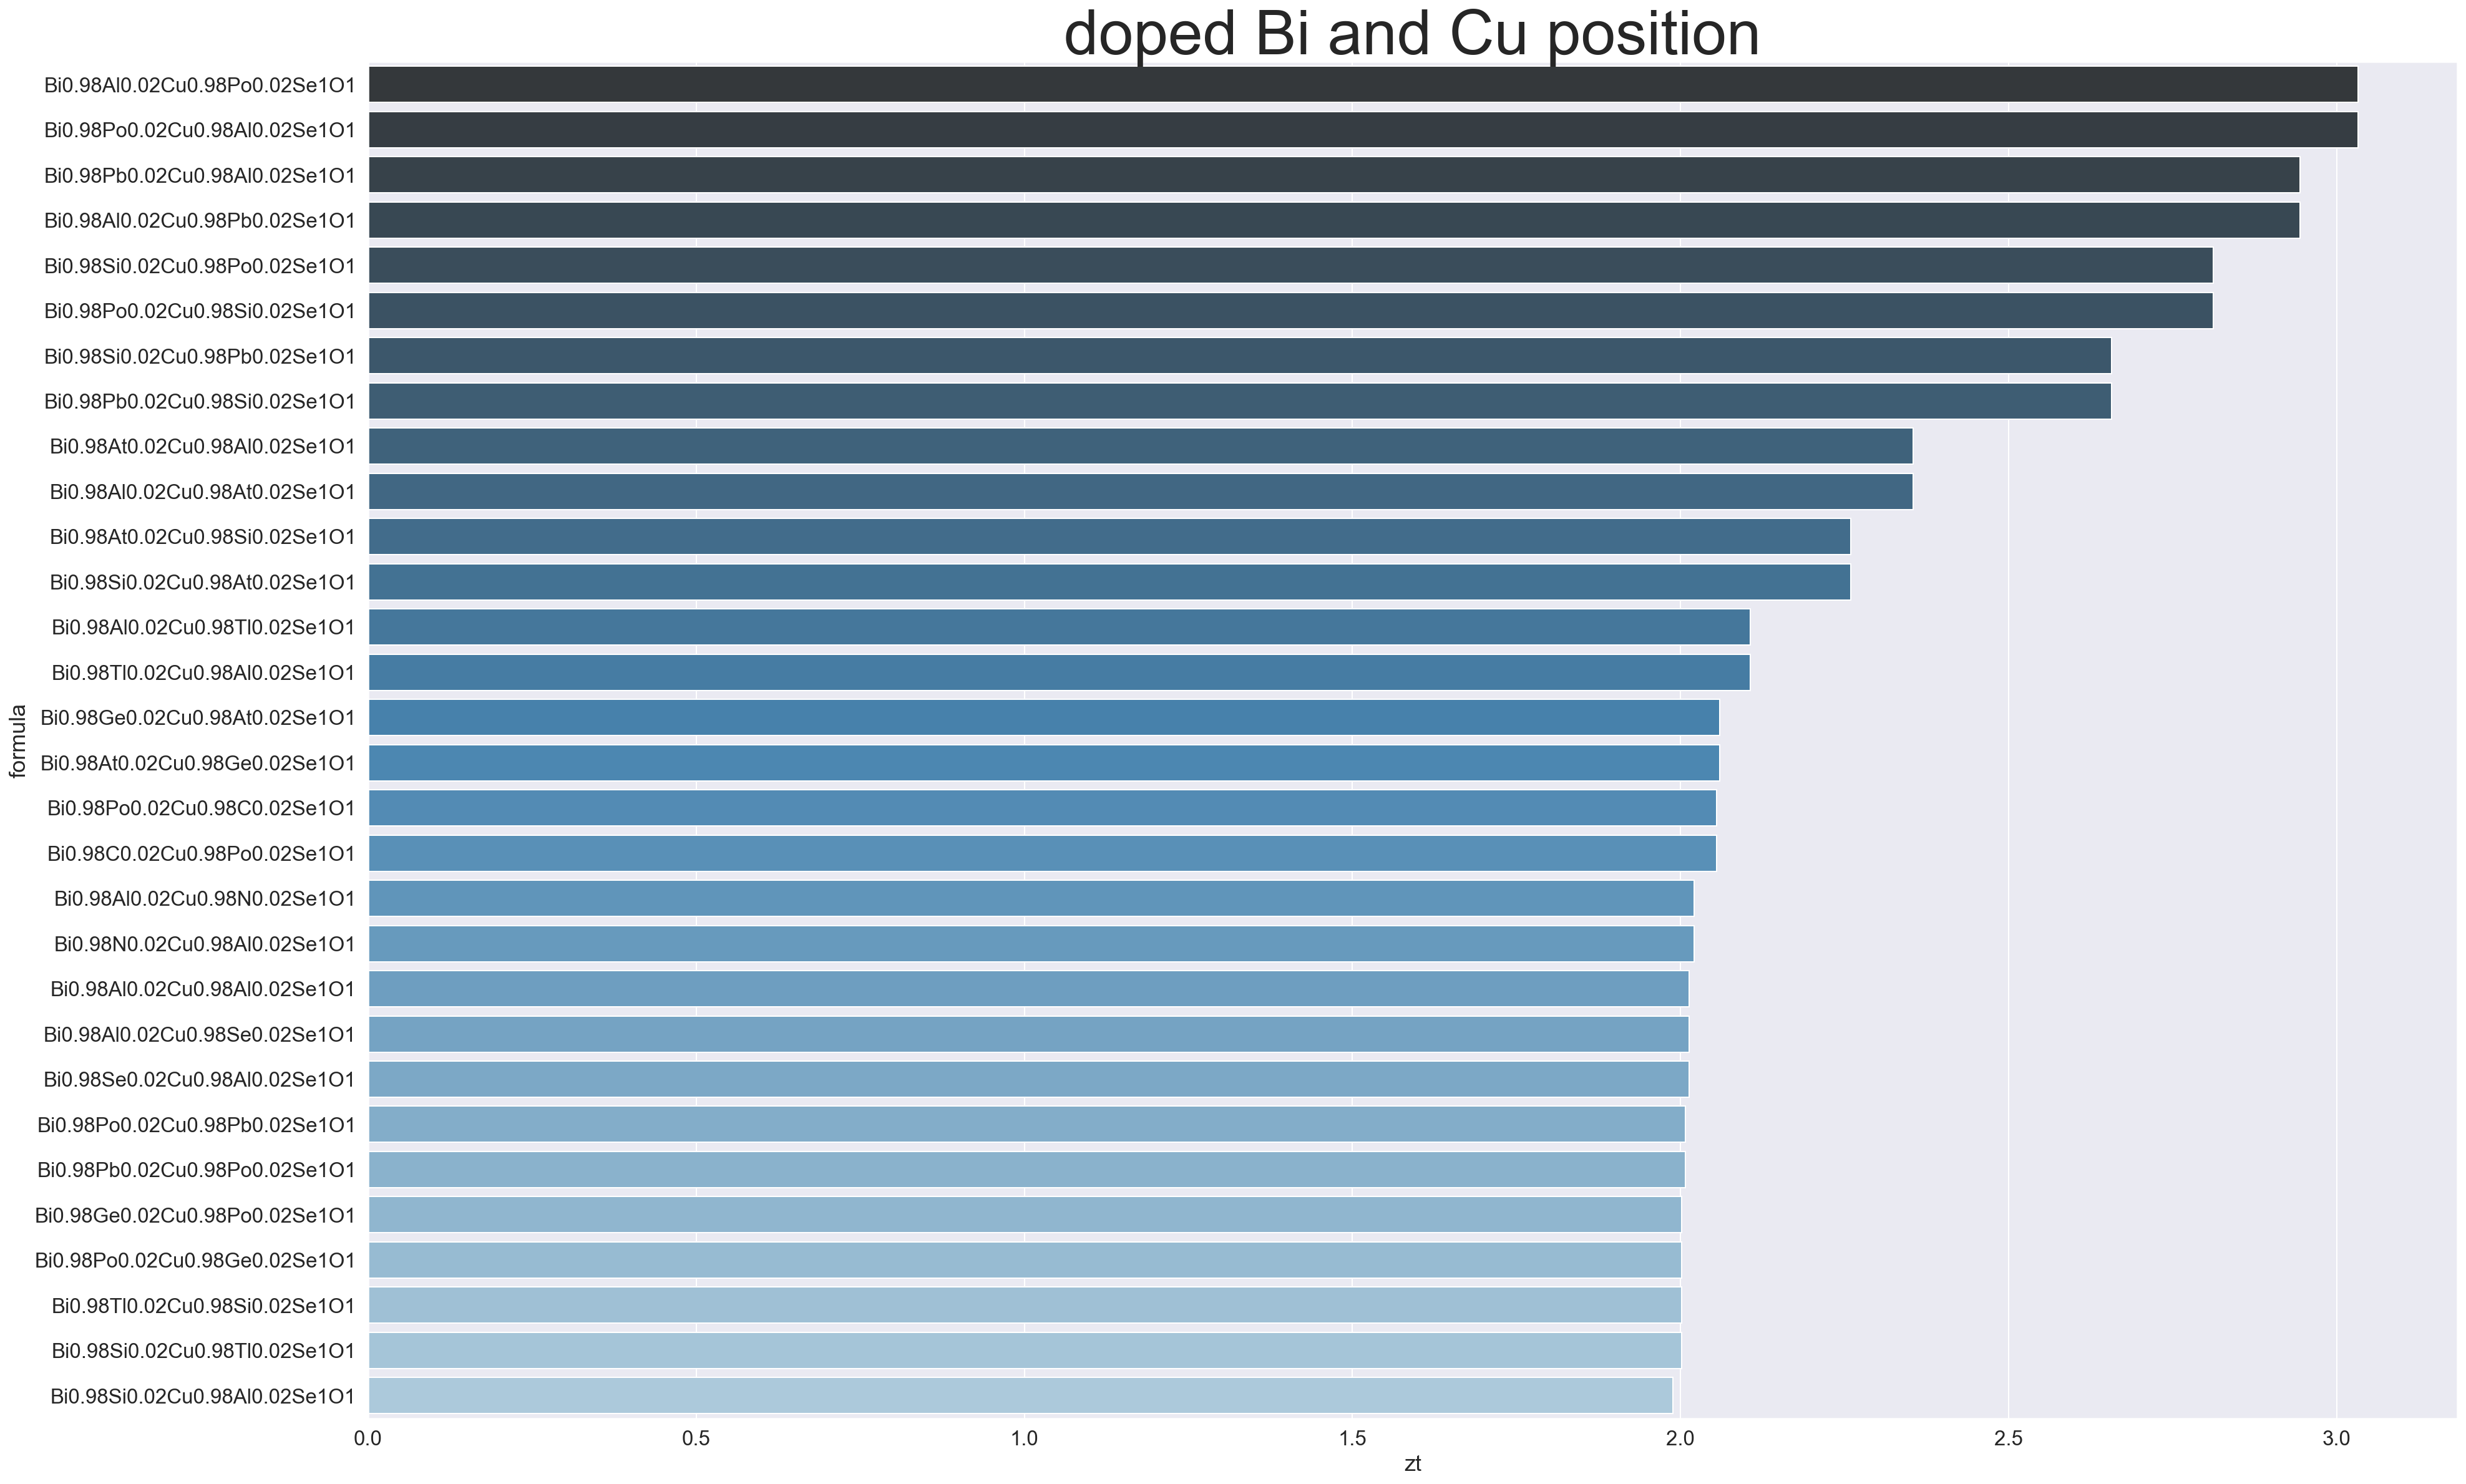

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


plt.figure(figsize=(30,20))
ax = sns.set(font_scale = 1.5)
ax = sns.barplot(y='formula', x='zt', data=zt_31,palette="Blues_d")
ax.axes.set_title("doped Bi and Cu position",fontsize=50)
ax.figure.savefig("prediction of dope 2 Bi,Cu.jpg")

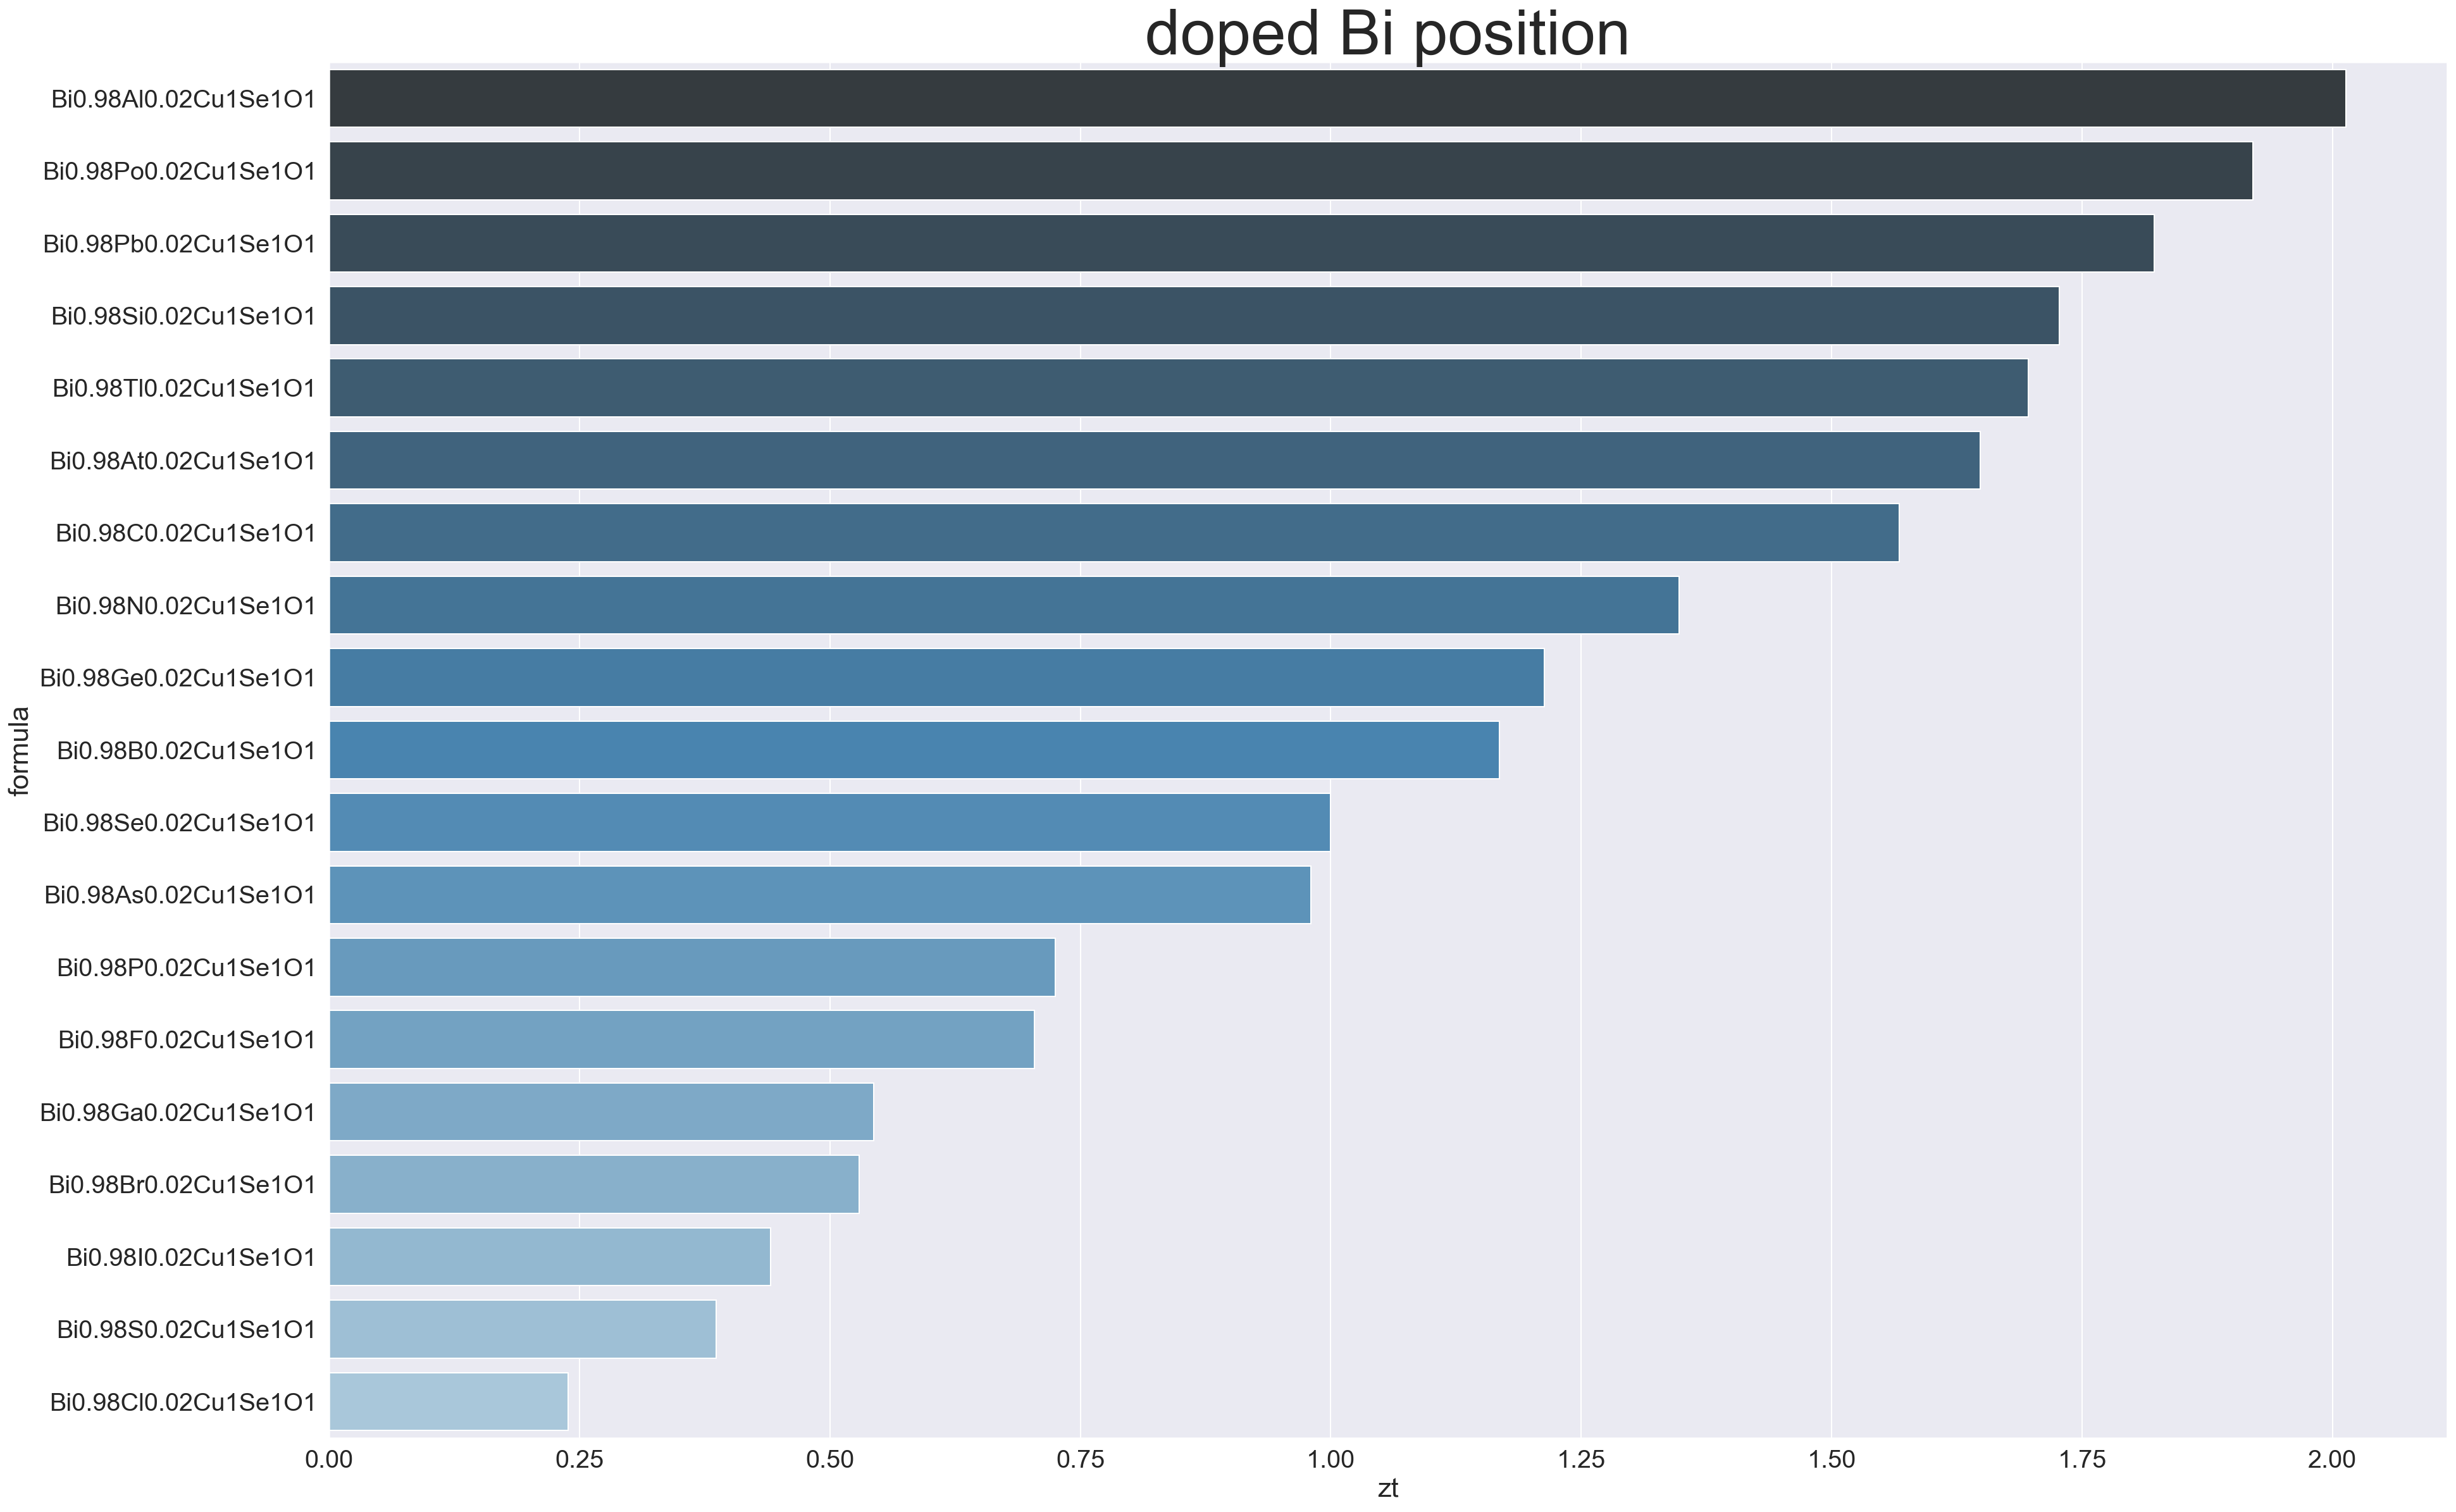

In [63]:
zt = zt.sort_values(by=['zt'], ascending=False)
plt.figure(figsize=(30,20))
ax2 = sns.set(font_scale = 1.8)
ax2 = sns.barplot(y='formula', x='zt', data=zt,palette="Blues_d")
ax2.axes.set_title("doped Bi position",fontsize=50)
ax2.figure.savefig("prediction of dope Bi.jpg")

KeyError: 'formula'

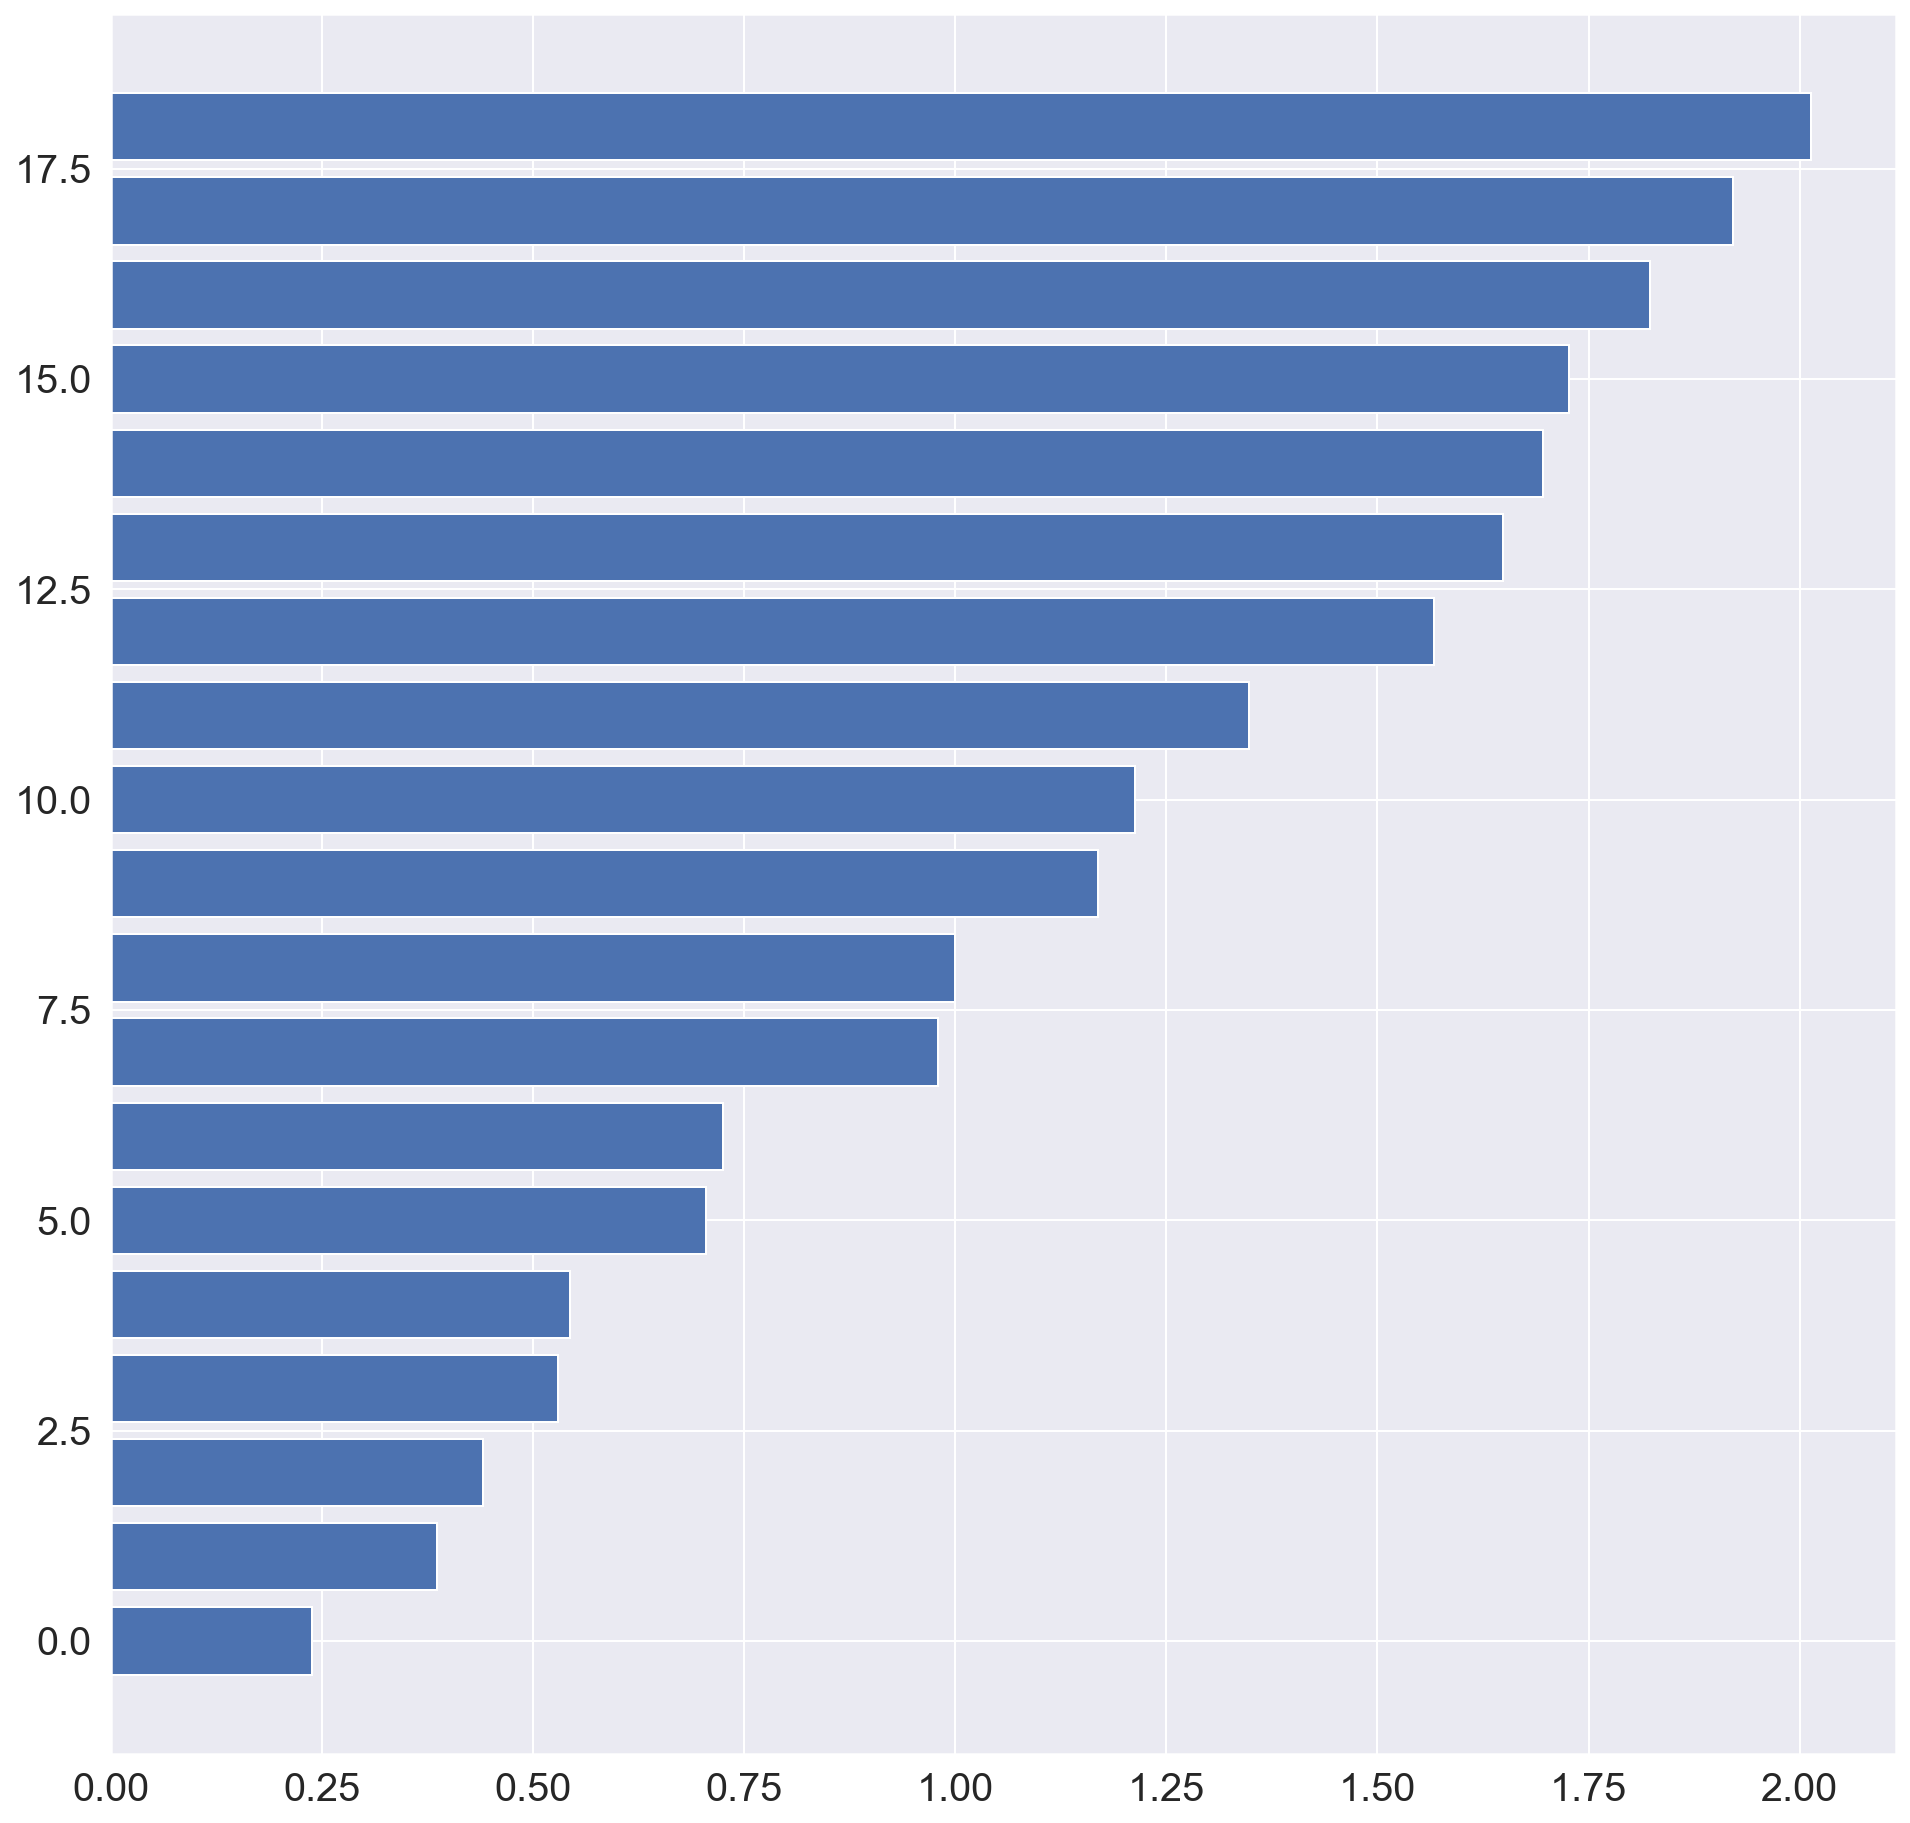

In [64]:
#Dope Cu Position

zt_2 = zt_2.sort_values(by=['zt'])

plt.figure(figsize=[16,16])
plt.axes()
plt.barh(np.arange(19),zt_2['zt'], )
plt.yticks(np.arange(19),zt_2['formula'], fontsize=15 )
plt.title('ZT',fontsize=25)
plt.show()

# kfold cross validation

In [65]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'zt_train.csv')

test_path = os.path.join(PATH, 'zt_test.csv')

df_train2 = pd.read_csv(train_path)

df_test2 = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train2.shape}')

print(f'df_test DataFrame shape: {df_test2.shape}')

df_train DataFrame shape: (127, 5)
df_test DataFrame shape: (18, 5)


In [66]:
print('DataFrame column names before renaming:')
print(df_train2.columns)

print(df_test2.columns)

rename_dict = {'c': 'target'}
df_train2 = df_train2.rename(columns=rename_dict)

df_test2 = df_test2.rename(columns=rename_dict)



print('\nDataFrame column names after renaming:')
print(df_train2.columns)

print(df_test2.columns)

DataFrame column names before renaming:
Index(['formula', 'k', 'c', 's', 'zt'], dtype='object')
Index(['formula', 'k', 'c', 's', 'zt'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'k', 'target', 's', 'zt'], dtype='object')
Index(['formula', 'k', 'target', 's', 'zt'], dtype='object')


In [67]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train2, elem_prop='Magpie', drop_duplicates=False, extend_features=True, sum_feat=True)

X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test2, elem_prop='Magpie', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...: 100%|██████████| 18/18 [00:00<00:00, 5846.63it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [68]:
x2 = pd.concat([X_train_unscaled,X_test_unscaled])
#y = pd.concat([y_train,y_test])

In [69]:
x2

,sum_Number,sum_MendeleevNumber,sum_AtomicWeight,sum_MeltingT,sum_Column,sum_Row,sum_CovalentRadius,sum_Electronegativity,sum_NsValence,sum_NpValence,...,range_NdUnfilled,range_NfUnfilled,range_NUnfilled,range_GSvolume_pa,range_GSbandgap,range_GSmagmom,range_SpaceGroupNumber,k,s,zt
0,154.000,326.00,367.485800,2450.9700,58.000,16.000,466.000,9.91000,7.00,11.000,...,0.0,0.00,0.50,100.241705,0.119700,0.0,8454.1875,1.000000,1.000000,1.000000
1,153.340,325.88,365.680392,2450.1836,57.980,15.980,465.820,9.90880,7.00,10.980,...,0.0,0.00,1.04,109.456054,0.102144,0.0,7669.3600,1.185518,0.992608,0.759896
2,152.680,325.76,363.874984,2449.3972,57.960,15.960,465.640,9.90760,7.00,10.960,...,0.0,0.00,1.04,109.456054,0.102144,0.0,7669.3600,1.389035,1.025874,0.723758
3,152.020,325.64,362.069576,2448.6108,57.940,15.940,465.460,9.90640,7.00,10.940,...,0.0,0.00,1.04,109.456054,0.102144,0.0,7669.3600,1.221515,1.170023,0.691516
4,153.650,325.84,366.520106,2451.4682,57.970,15.990,465.960,9.90670,7.00,10.970,...,0.0,0.00,1.04,80.204706,0.102144,0.0,9395.0400,0.835767,0.946847,1.628063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,149.680,320.96,356.326362,2440.5582,57.160,15.820,467.080,9.84460,6.94,10.820,...,0.0,0.00,0.56,94.578948,0.102144,0.0,11027.4400,0.845387,0.700542,1.594985
14,148.375,316.25,352.315750,2514.1700,56.375,15.875,471.875,9.77625,7.00,10.625,...,0.0,0.00,1.04,270.288520,0.102144,0.0,10821.0400,1.547510,0.423193,2.664499
15,151.360,326.32,360.544704,2436.0580,58.080,15.880,464.160,9.95560,7.00,11.080,...,0.0,0.00,0.56,83.782494,0.937199,0.0,6763.8400,1.014666,0.847687,0.201291
16,153.040,322.82,364.842795,2523.1260,57.280,16.000,468.640,9.86260,7.00,10.820,...,0.0,1.44,0.56,99.455222,0.102144,0.0,9395.0400,1.198233,0.694640,1.155676


In [70]:
#x = x2[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]

x = x2[['range_SpaceGroupNumber','var_NValence','range_Row','var_GSvolume_pa','range_NfValence','var_Column','range_Electronegativity']]




In [71]:
x

,range_SpaceGroupNumber,var_NValence,range_Row,var_GSvolume_pa,range_NfValence,var_Column,range_Electronegativity
0,8454.1875,23.0,2.00,23.845,36.75,5.0,0.368619
1,7669.3600,23.0,1.76,24.180,31.36,5.0,0.337744
2,7669.3600,23.0,1.76,24.180,31.36,5.0,0.337744
3,7669.3600,23.0,1.76,24.180,31.36,5.0,0.337744
4,9395.0400,23.0,1.76,23.845,31.36,5.0,0.394120
...,...,...,...,...,...,...,...
13,11027.4400,28.0,1.76,23.845,31.36,15.0,0.678056
14,10821.0400,27.0,1.76,45.125,31.36,14.0,0.668216
15,6763.8400,23.0,1.76,23.845,31.36,6.0,0.369424
16,9395.0400,23.0,2.24,23.845,38.40,13.0,0.543896


In [72]:
y = x2[['zt']]
y.values.reshape(-1,1).ravel()

array([1.        , 0.75989623, 0.72375801, 0.69151636, 1.62806323,
       2.34781874, 1.74641477, 1.26397895, 1.11775148, 1.14697777,
       0.47046195, 0.94596936, 1.06365999, 1.45191089, 1.53656949,
       1.57548005, 1.66448312, 1.16544406, 1.10127488, 2.3983494 ,
       2.16320879, 2.24368207, 2.0501554 , 2.50910742, 1.40310401,
       1.07994661, 0.88671686, 1.49871884, 1.4492518 , 1.20103589,
       1.02854535, 1.36244198, 1.04761536, 0.99849316, 0.99215567,
       1.11526527, 1.07989811, 4.82284352, 5.86066093, 6.7145395 ,
       6.27861092, 5.03067311, 1.65138646, 1.37604658, 1.4471348 ,
       1.6218297 , 1.91053331, 0.87242276, 1.44102226, 1.51341375,
       6.46340336, 5.70819815, 8.07129073, 1.39754834, 1.50950674,
       1.59751142, 2.12091737, 2.98875974, 2.70434514, 0.88930683,
       0.93330315, 0.93459664, 0.9703666 , 0.84511771, 0.89818095,
       1.19182591, 0.93302368, 2.91788475, 3.74966738, 6.04709888,
       5.44742171, 1.40472512, 0.95704512, 2.47950038, 2.85917

In [73]:
y = y.values.ravel()
y

array([1.        , 0.75989623, 0.72375801, 0.69151636, 1.62806323,
       2.34781874, 1.74641477, 1.26397895, 1.11775148, 1.14697777,
       0.47046195, 0.94596936, 1.06365999, 1.45191089, 1.53656949,
       1.57548005, 1.66448312, 1.16544406, 1.10127488, 2.3983494 ,
       2.16320879, 2.24368207, 2.0501554 , 2.50910742, 1.40310401,
       1.07994661, 0.88671686, 1.49871884, 1.4492518 , 1.20103589,
       1.02854535, 1.36244198, 1.04761536, 0.99849316, 0.99215567,
       1.11526527, 1.07989811, 4.82284352, 5.86066093, 6.7145395 ,
       6.27861092, 5.03067311, 1.65138646, 1.37604658, 1.4471348 ,
       1.6218297 , 1.91053331, 0.87242276, 1.44102226, 1.51341375,
       6.46340336, 5.70819815, 8.07129073, 1.39754834, 1.50950674,
       1.59751142, 2.12091737, 2.98875974, 2.70434514, 0.88930683,
       0.93330315, 0.93459664, 0.9703666 , 0.84511771, 0.89818095,
       1.19182591, 0.93302368, 2.91788475, 3.74966738, 6.04709888,
       5.44742171, 1.40472512, 0.95704512, 2.47950038, 2.85917

In [388]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [452]:
gbreg = GradientBoostingRegressor()
logreg = LogisticRegression()
rfreg = RandomForestRegressor(n_estimators=2000, n_jobs=-1, random_state = 42)
ex = ExtraTreesRegressor(n_estimators=1000)
xgb = XGBRegressor()
s_model = {gbreg,logreg,rfreg,ex, xgb, DummyRegressor()}



In [453]:
scores = cross_validate( rfreg, x, y, cv= 6, return_train_score=True,  scoring=('r2', 'neg_mean_squared_error'))


scores

exception calling callback for <Future at 0x7f9d42084cd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7f9d4147cb10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7f9d421eea10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

{'fit_time': array([0.80380392, 0.83997202, 0.9179337 , 0.8776288 , 0.85813808,
        0.8361311 ]),
 'score_time': array([0., 0., 0., 0., 0., 0.]),
 'test_r2': array([nan, nan, nan, nan, nan, nan]),
 'train_r2': array([nan, nan, nan, nan, nan, nan]),
 'test_neg_mean_squared_error': array([nan, nan, nan, nan, nan, nan]),
 'train_neg_mean_squared_error': array([nan, nan, nan, nan, nan, nan])}

In [390]:
scores = cross_validate( rfreg, x, y, cv= 6, return_train_score=True,  scoring=('r2', 'neg_mean_squared_error'))

print('-------------------------------------------')
print(scores['test_neg_mean_squared_error'])
print('--------------------R-square------------------------')
print(scores['train_r2'])
print('--------------------R-square-test------------------------')
print(scores['test_r2'])
print('-------------------------------------------')
#print("Cross-validation scores: {}".format(scores))

exception calling callback for <Future at 0x7f9d42726cd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7f9d319148d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

exception calling callback for <Future at 0x7f9d42685710 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 551, in apply_async
    future = self._workers.submit(SafeFunction(func))

-------------------------------------------
[nan nan nan nan nan nan]
--------------------R-square------------------------
[nan nan nan nan nan nan]
--------------------R-square-test------------------------
[nan nan nan nan nan nan]
-------------------------------------------


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 1017, in __call__
    self.retrieve()
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 909, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 562, in wrap_future_result
    return future.result(timeout=timeout)
  File "/opt/anaconda3/li

In [154]:
print("Average cross-validation score: {:.2f}".format(scores['test_r2'].mean()))

Average cross-validation score: 0.32


In [143]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.764615,0.059342,-0.016307,0.670711,-0.672064,-0.891814
1,0.742212,0.058657,0.189727,0.750340,-2.979507,-0.532783
2,0.732184,0.069542,0.193677,0.603030,-3.236573,-0.817082
3,0.734647,0.059752,0.264381,0.658338,-1.067415,-0.883953
4,0.746270,0.060573,0.647215,0.625507,-0.567364,-0.949142
5,0.748177,0.070718,0.719950,0.625082,-0.704463,-0.885362


In [495]:
X_train

array([[-0.5336029 , -0.43335779,  0.19720122, ...,  0.13292304,
        -0.53382381, -0.38244033],
       [-0.63977064, -0.31818476, -0.31129694, ..., -0.29258795,
        -0.39195003, -0.36935186],
       [-0.63977064, -0.31818476, -0.31129694, ..., -0.29258795,
        -0.39195003, -0.36935186],
       ...,
       [ 0.46654387, -0.29778884, -0.01270267, ...,  0.55241728,
        -0.36682569, -0.48480182],
       [ 0.46654387, -0.29778884, -0.01270267, ...,  0.55241728,
        -0.36682569, -0.48480182],
       [ 0.46654387, -0.29778884, -0.01270267, ...,  0.55241728,
        -0.36682569, -0.48480182]])

# Leave one out cross validation

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

In [11]:
PATH = os.getcwd()
train_path = os.path.join(PATH, 'zt_train.csv')

test_path = os.path.join(PATH, 'zt_test.csv')

df_train = pd.read_csv(train_path)

df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')

print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (127, 5)
df_test DataFrame shape: (18, 5)


In [12]:
print('DataFrame column names before renaming:')
print(df_train.columns)

print(df_test.columns)

rename_dict = {'zt': 'target'}
df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

df_train = df_train.rename(columns=rename_dict)

df_test = df_test.rename(columns=rename_dict)

print('\nDataFrame column names after renaming:')
print(df_train.columns)

print(df_test.columns)

DataFrame column names before renaming:
Index(['formula', 'k', 'c', 's', 'zt'], dtype='object')
Index(['formula', 'k', 'c', 's', 'zt'], dtype='object')

DataFrame column names after renaming:
Index(['formula', 'k', 'c', 's', 'target'], dtype='object')
Index(['formula', 'k', 'c', 's', 'target'], dtype='object')


In [13]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)

X_test_unscaled, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='Magpie', drop_duplicates=False, extend_features=False, sum_feat=True)



Assigning Features...: 100%|██████████| 18/18 [00:00<00:00, 6787.51it/s]

	Featurizing Compositions...
	Creating Pandas Objects...
	Featurizing Compositions...
	Creating Pandas Objects...


In [30]:
#X_train_unscaled = X_train_unscaled[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]
#X_test_unscaled = X_test_unscaled[['var_NValence', 'range_SpaceGroupNumber', 'range_Row', 'var_Column','range_NfValence', 'var_GSvolume_pa']]

In [14]:
X_train_unscaled = X_train_unscaled[['range_SpaceGroupNumber','range_NfValence','range_NValence','range_Row','var_NValence']]
X_test_unscaled = X_test_unscaled[['range_SpaceGroupNumber','range_NfValence','range_NValence','range_Row','var_NValence']]

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)

X_test = scaler.transform(X_test_unscaled)

In [17]:
X_train_1 = normalize(X_train)
X_test_1 = normalize(X_test)

y_train_1 = y_train.values.ravel()
y_test_1 = y_test.values.ravel()

In [18]:
len(X_train_1)

127

In [19]:
from sklearn.neighbors import KNeighborsRegressor

#model = ExtraTreesRegressor(criterion='mae',n_estimators=500 )
model = KNeighborsRegressor(leaf_size=1000, n_jobs=-1 )

In [22]:
>>> import numpy as np
>>> from sklearn.model_selection import LeaveOneOut
#>>> X = np.array([[1, 2], [3, 4]])
#>>> y = np.array([1, 2])
>>> loo = LeaveOneOut()
>>> loo.get_n_splits(X_train_1)

>>> print(loo)
LeaveOneOut()
Predict_value = []
mae = []
mse = []
error = []
>>> for train_index, test_index in loo.split(X_train_1):
   
        X_train, X_test = X_train_1[train_index], X_train_1[test_index]
        y_train, y_test = y_train_1[train_index], y_train_1[test_index]
        model.fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        Predict_value.append(y_pred_test)
        
        mae1 = mean_absolute_error(y_test, y_pred_test)
        mae.append(mae1)
        
        mse1 = mean_squared_error(y_test, y_pred_test)
        mse.append(mse1)
        
        error_percent = 100*(abs(y_test-y_pred_test))/y_test
        error.append(error_percent)
        #score_leave = model.score(y_test, y_pred_test)
        
        
        
        

LeaveOneOut()


In [55]:
pd.DataFrame(error).sort_values(by=0, ascending = False).tail(50)

,0
106,20.456139
115,20.190448
111,19.152752
8,19.142950
46,18.966814
30,18.918821
124,18.838934
23,18.229888
40,18.189039
101,17.585297


In [23]:
aa = pd.DataFrame(error).tail(100).sort_values(by=0, ascending = False)

In [24]:
print("------------------------------------------------------------------------")
print("Mean average error of ZT:", np.mean(mae))
print("------------------------------------------------------------------------")
print("Mean square error of ZT :", np.mean(mse))
print("------------------------------------------------------------------------")
print("Percentage of ZT error  :", np.mean(error),'%')
print("------------------------------------------------------------------------")
print("Average of predicted ZT :", np.mean(Predict_value))
print("------------------------------------------------------------------------")





------------------------------------------------------------------------
Mean average error of ZT: 0.7182714083795275
------------------------------------------------------------------------
Mean square error of ZT : 1.489013229466235
------------------------------------------------------------------------
Percentage of ZT error  : 47.39511608708713 %
------------------------------------------------------------------------
Average of predicted ZT : 1.9820846000283465
------------------------------------------------------------------------


In [ ]:
def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val